In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all 
#files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you 
#create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#!pip uninstall tensorflow

In [2]:
!pip install tensorflow==2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 82.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 86.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 49.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting 

In [4]:
import tensorflow as tf
import datetime
import os
import numpy as np
import pathlib
import pandas as pd
import requests
from io import BytesIO
import statistics
import random
from platform import platform
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow import keras
from tensorflow.keras import layers, Model, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B2
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, InputLayer, Softmax, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, RandomFlip, RandomRotation


In [ ]:
def print_system_info_laptop():
    print(f"nTF:     {tf.__version__}\nKeras:  {tf.keras.__version__}")
    gpus = tf.config.list_physical_devices('GPU')
    print(f"\nGPUs:   {len(gpus) if gpus else 'No GPU available. Running on CPU.'}")
print_system_info_laptop()

In [12]:
output_directory = '/Users/user/Documents/InfoShareAcademy/kaggle' #os.path.join(input_directory, 'birds.csv')
# input_directory = '/kaggle/input'
# data = pd.read_csv(os.path.join(input_directory, 'birds.csv'))
# data(head)

In [5]:
main_path = '/kaggle/input/100-bird-species'

In [6]:
train = os.path.join(main_path,'train')
test = os.path.join(main_path,'test')
valid = os.path.join(main_path,'valid')

In [7]:
print(train)

/kaggle/input/100-bird-species/train


In [8]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train,
    labels='inferred',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )

test_data = tf.keras.utils.image_dataset_from_directory(
    test,
    labels='inferred',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )

val_data = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels='inferred',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    )

class_names = train_data.class_names
#print(class_names)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


# Simple CNN Model

In [ ]:
# data augumentaition - applied in the model as layers

num_classes = 525

model_cna = Sequential()
model_cna.add(InputLayer(input_shape=(224, 224, 3)))
model_cna.add(Rescaling(1./255))
model_cna.add(RandomFlip("horizontal_and_vertical"))
model_cna.add(RandomRotation(0.2))
model_cna.add(Conv2D(128, 5, activation='relu'))
model_cna.add(MaxPooling2D((2,2)))
model_cna.add(Conv2D(256, 5, activation='relu'))
model_cna.add(MaxPooling2D((2,2)))
model_cna.add(Conv2D(128, 3, activation='relu'))
model_cna.add(MaxPooling2D((2,2)))
model_cna.add(Conv2D(64, 3, activation='relu'))
model_cna.add(MaxPooling2D((2,2)))
model_cna.add(Conv2D(32, 1, activation='relu'))
model_cna.add(MaxPooling2D((2,2)))
model_cna.add(BatchNormalization())
model_cna.add(Dense(32, activation='relu'))
model_cna.add(Flatten())
model_cna.add(Dense(num_classes))
model_cna.add(Softmax())
print(model_cna.summary())


In [ ]:
model_cna.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# callback early stopping
# zatrzymanie treningu w momencie, kiedy val_loss nie spada przez n epok
es_cna = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5
    )

modelcheck_lr_a = tf.keras.callbacks.ModelCheckpoint(filepath= '/kaggle/working/model_cna_kagg.h5'
 ,monitor='val_loss', save_best_only = True, save_format='tf')

In [ ]:
model_hist_cna = model_cna.fit(train_data, validation_data = val_data, epochs = 80, callbacks = [es_cna, modelcheck_lr_a])

In [ ]:
#Visualizing the result
acc = model_hist_cna.history['accuracy']
val_acc = model_hist_cna.history['val_accuracy']
loss = model_hist_cna.history['loss']
val_loss = model_hist_cna.history['val_loss']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, 'o-',label = 'Training accuracy')
ax[0].plot(val_acc, 'o-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, 'o-',label = 'Training loss')
ax[1].plot(val_loss, 'o-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

### EficcientNetB0 - new training

In [ ]:
# Downloading the pre-trained model from API
eff_net_model_base = EfficientNetB0(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(224,224,3),
                    pooling='max',
                    classes=525,
                    classifier_activation='softmax'
                )

# setting all the layers of this model to false
eff_net_model_base.trainable = False

In [ ]:
model_efs = Sequential()
model_efs.add(InputLayer(input_shape=(224, 224, 3)))
model_efs.add(eff_net_model_base)
model_efs.add(Dropout(0.2))
model_efs.add(Dense(525,activation='softmax'))

model_efs.summary()

In [ ]:
model_efs.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# callback early stopping
# zatrzymanie treningu w momencie, kiedy val_loss nie spada przez n epok
es_efs = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5
)

modelcheck_lr_s = tf.keras.callbacks.ModelCheckpoint(filepath= '/kaggle/working/model_efn0_kagg_pre.h5'
 ,monitor='val_loss', save_best_only = True, save_format='tf')

In [ ]:
model_hist_efs = model_efs.fit(train_data, validation_data = val_data, epochs = 5, callbacks = [ es_efs, modelcheck_lr_s])

In [ ]:
# setting all the layers of this model to True - start training
eff_net_model_base.trainable = True

model_efs.summary()

In [ ]:
model_efs.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model_hist_efs = model_efs.fit(train_data, validation_data = val_data, epochs = 20, callbacks = [ es_efs, modelcheck_lr_s])

In [ ]:
#Visualizing the result
acc = model_hist_efs.history['accuracy']
val_acc = model_hist_efs.history['val_accuracy']
loss = model_hist_efs.history['loss']
val_loss = model_hist_efs.history['val_loss']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, 'o-',label = 'Training accuracy')
ax[0].plot(val_acc, 'o-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, 'o-',label = 'Training loss')
ax[1].plot(val_loss, 'o-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

### EfficientnetB0 z augumentacja

In [ ]:
# Downloading the pre-trained model from API
eff_net_model_basea = EfficientNetB0(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(224,224,3),
                    pooling='max',
                    classes=525,
                    classifier_activation='softmax'
                )

# setting all the layers of this model to false
eff_net_model_basea.trainable = False

In [ ]:
model_efsa = Sequential()
model_efsa.add(InputLayer(input_shape=(224, 224, 3)))
model_efsa.add(RandomFlip("horizontal_and_vertical"))
model_efsa.add(RandomRotation(0.2))
model_efsa.add(eff_net_model_basea)
model_efsa.add(Dropout(0.2))
model_efsa.add(Dense(525,activation='softmax'))

model_efsa.summary()

In [ ]:
model_efsa.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# callback early stopping
# zatrzymanie treningu w momencie, kiedy val_loss nie spada przez n epok
es_efsa = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5
)

modelcheck_lr_sa = tf.keras.callbacks.ModelCheckpoint(filepath= '/kaggle/working/model_efn0_kagg_pre_a.h5'
 ,monitor='val_loss', save_best_only = True, save_format='tf')

In [ ]:
model_hist_efsa = model_efsa.fit(train_data, validation_data = val_data, epochs = 15, callbacks = [ es_efsa, modelcheck_lr_sa])

In [ ]:
#Visualizing the result first training
acc = model_hist_efsa.history['accuracy']
val_acc = model_hist_efsa.history['val_accuracy']
loss = model_hist_efsa.history['loss']
val_loss = model_hist_efsa.history['val_loss']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, 'o-',label = 'Training accuracy')
ax[0].plot(val_acc, 'o-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, 'o-',label = 'Training loss')
ax[1].plot(val_loss, 'o-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

In [ ]:
# setting all the layers of this model to True - start training
eff_net_model_basea.trainable = True

model_efsa.summary()

In [ ]:
model_efsa.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model_hist_efsa = model_efsa.fit(train_data, validation_data = val_data, epochs = 25, callbacks = [ es_efsa, modelcheck_lr_sa])

In [ ]:
#Visualizing the result
acc = model_hist_efsa.history['accuracy']
val_acc = model_hist_efsa.history['val_accuracy']
loss = model_hist_efsa.history['loss']
val_loss = model_hist_efsa.history['val_loss']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, 'o-',label = 'Training accuracy')
ax[0].plot(val_acc, 'o-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, 'o-',label = 'Training loss')
ax[1].plot(val_loss, 'o-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

### ResNet50_v2 plus augumentacja

In [13]:
res_net_model = tf.keras.applications.resnet_v2.ResNet50V2(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(224,224,3),
                    pooling='max',
                    classes=525,
                    classifier_activation='softmax')
    
res_net_model.trainable = False

94668760/94668760 [==============================] - 1s 0us/step


In [14]:
model_res = Sequential()
model_res.add(InputLayer(input_shape=(224, 224, 3)))
model_res.add(Rescaling(1./255))
model_res.add(RandomFlip("horizontal_and_vertical"))
model_res.add(RandomRotation(0.2))
model_res.add(res_net_model)
model_res.add(Dropout(0.2))
model_res.add(Dense(525,activation='softmax'))

model_res.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 525)               1075725   
                                                        

In [15]:
model_res.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [20]:
# callback early stopping
# zatrzymanie treningu w momencie, kiedy val_loss nie spada przez n epok
es_res = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5
)

modelcheck_lr_res = tf.keras.callbacks.ModelCheckpoint(filepath= '/kaggle/working/model_res50_kagg_pre_a.h5'
 ,monitor='val_loss', save_best_only = True, save_format='tf')

In [28]:
os.path.exists('/Users/user/Documents/InfoShareAcademy/kaggle/')

False

In [21]:
model_hist_res = model_res.fit(train_data, validation_data = val_data, epochs = 15, callbacks = [ es_res, modelcheck_lr_res])

Epoch 1/15
2645/2645 [==============================] - 389s 143ms/step - loss: 15.8432 - accuracy: 0.3065 - val_loss: 6.0033 - val_accuracy: 0.6152
Epoch 2/15
2645/2645 [==============================] - 362s 136ms/step - loss: 13.0245 - accuracy: 0.4755 - val_loss: 5.1776 - val_accuracy: 0.6979
Epoch 3/15
2645/2645 [==============================] - 356s 134ms/step - loss: 12.8593 - accuracy: 0.5297 - val_loss: 5.2274 - val_accuracy: 0.7284
Epoch 4/15
2645/2645 [==============================] - 352s 133ms/step - loss: 12.7818 - accuracy: 0.5617 - val_loss: 5.0919 - val_accuracy: 0.7543
Epoch 5/15
2645/2645 [==============================] - 355s 134ms/step - loss: 12.7576 - accuracy: 0.5821 - val_loss: 4.8529 - val_accuracy: 0.7589
Epoch 6/15
2645/2645 [==============================] - 358s 135ms/step - loss: 12.9670 - accuracy: 0.5973 - val_loss: 5.1130 - val_accuracy: 0.7794
Epoch 7/15
2645/2645 [==============================] - 355s 134ms/step - loss: 12.8775 - accuracy: 0.6124

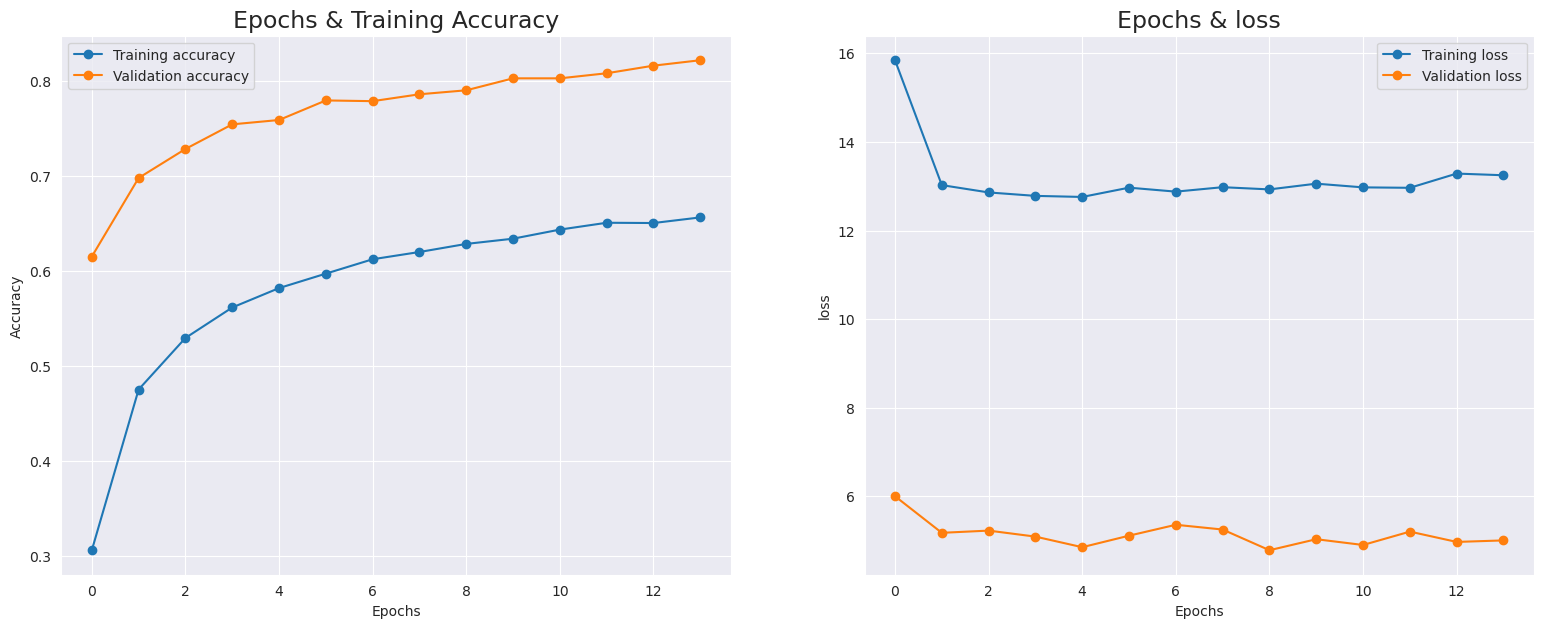

In [23]:
#Visualizing the result first training
acc = model_hist_res.history['accuracy']
val_acc = model_hist_res.history['val_accuracy']
loss = model_hist_res.history['loss']
val_loss = model_hist_res.history['val_loss']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, 'o-',label = 'Training accuracy')
ax[0].plot(val_acc, 'o-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, 'o-',label = 'Training loss')
ax[1].plot(val_loss, 'o-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

In [24]:
# setting all the layers of this model to True - start training
res_net_model.trainable = True

model_res.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 525)               1075725   
                                                        

In [25]:
model_res.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [26]:
model_hist_res = model_res.fit(train_data, validation_data = val_data, epochs = 35, callbacks = [ es_res, modelcheck_lr_res])

Epoch 1/35
2645/2645 [==============================] - 914s 343ms/step - loss: 6.1851 - accuracy: 0.6245 - val_loss: 1.3399 - val_accuracy: 0.8270
Epoch 2/35
2645/2645 [==============================] - 905s 342ms/step - loss: 2.0500 - accuracy: 0.6833 - val_loss: 0.8426 - val_accuracy: 0.8461
Epoch 3/35
2645/2645 [==============================] - 893s 338ms/step - loss: 1.4286 - accuracy: 0.7250 - val_loss: 0.6675 - val_accuracy: 0.8678
Epoch 4/35
2645/2645 [==============================] - 895s 338ms/step - loss: 1.1335 - accuracy: 0.7602 - val_loss: 0.5625 - val_accuracy: 0.8811
Epoch 5/35
2645/2645 [==============================] - 896s 339ms/step - loss: 0.9583 - accuracy: 0.7869 - val_loss: 0.4599 - val_accuracy: 0.8971
Epoch 6/35
2645/2645 [==============================] - 901s 340ms/step - loss: 0.8187 - accuracy: 0.8085 - val_loss: 0.4282 - val_accuracy: 0.8994
Epoch 7/35
2645/2645 [==============================] - 902s 341ms/step - loss: 0.7259 - accuracy: 0.8256 - val_

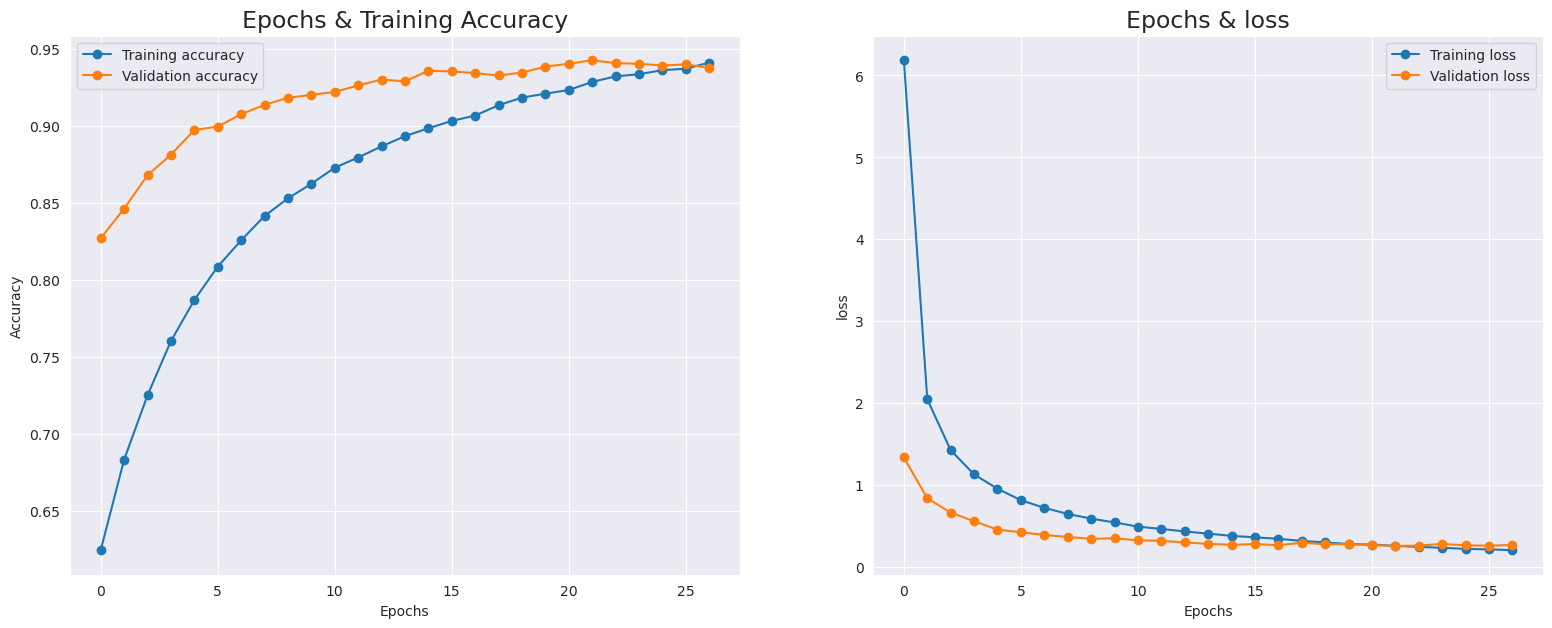

In [27]:
#Visualizing the result first training
acc = model_hist_res.history['accuracy']
val_acc = model_hist_res.history['val_accuracy']
loss = model_hist_res.history['loss']
val_loss = model_hist_res.history['val_loss']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, 'o-',label = 'Training accuracy')
ax[0].plot(val_acc, 'o-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, 'o-',label = 'Training loss')
ax[1].plot(val_loss, 'o-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

In [29]:
os.chdir(r'/kaggle/working')

In [30]:
from IPython.display import FileLink
FileLink(r'model_res50_kagg_pre_a.h5')

/kaggle/working/model_res50_kagg_pre_a.h5

<a href="/kaggle/working/model_res50_kagg_pre_a.h5"> Download File </a>